## **Ejercicio CNN: Clasificación de Imágenes con Modelos Preentrenados y CNNs Personalizadas en PyTorch**

En este ejercicio, exploraremos dos enfoques para la clasificación de imágenes utilizando PyTorch:

Uso de un Modelo Preentrenado (AlexNet): Aprenderemos a utilizar un modelo ya entrenado en el conjunto de datos ImageNet para clasificar imágenes de ejemplo, lo que demuestra el poder del Transfer Learning.

Construcción y Entrenamiento de una CNN Personalizada: Desarrollaremos una Red Neuronal Convolucional básica para clasificar imágenes del conjunto de datos CIFAR-10, comprendiendo los fundamentos de la arquitectura de CNNs y su entrenamiento.

## **Parte 1: Uso de AlexNet Preentrenado para Clasificación de Imágenes**

### **¿Qué es AlexNet?**

**AlexNet** es una de las arquitecturas de Redes Neuronales Convolucionales (CNN) más influyentes y revolucionarias en el campo del aprendizaje profundo y la visión por computadora. Fue presentada por **Alex Krizhevsky**, **Ilya Sutskever** y **Geoffrey Hinton** en su artículo titulado ["ImageNet Classification with Deep Convolutional Neural Networks"](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) publicado en 2012. Este modelo marcó un hito significativo al ganar el **Concurso de Reconocimiento de Imagen de ILSVRC (ImageNet Large Scale Visual Recognition Challenge)** ese mismo año, estableciendo nuevos estándares en precisión y eficiencia.

#### **Importancia Histórica de AlexNet**

- **Rendimiento Superior:** AlexNet logró reducir significativamente la tasa de error en la clasificación de imágenes en el conjunto de datos ImageNet, superando por un amplio margen a las metodologías existentes.
  
- **Popularización de las CNNs:** Su éxito demostró el poder de las Redes Neuronales Profundas, incentivando una amplia adopción y desarrollo de arquitecturas más complejas y eficientes.
  
- **Uso de GPU:** AlexNet fue uno de los primeros modelos en aprovechar la potencia de las **Unidades de Procesamiento Gráfico (GPU)** para acelerar el entrenamiento, lo que permitió manejar grandes volúmenes de datos y modelos más profundos.

#### **Arquitectura de AlexNet**

La arquitectura de AlexNet se compone de **8 capas principales**: **5 capas convolucionales** seguidas de **3 capas completamente conectadas**. A continuación, se describen sus componentes clave:

1. **Capas Convolucionales (Conv Layers):**
   - **Filtros:** Utiliza múltiples filtros para extraer características espaciales de las imágenes.
   - **Tamaño de Filtro:** Predominantemente filtros de tamaño 11x11 en la primera capa, seguidos de 5x5 y 3x3 en las capas posteriores.
   - **Stride y Padding:** Parámetros que controlan el movimiento de los filtros y el manejo de los bordes de la imagen.
   - **ReLU (Rectified Linear Unit):** Función de activación no lineal que introduce no linealidad en el modelo.

2. **Capas de Pooling:**
   - **Max Pooling:** Reduce la dimensionalidad espacial de las características, disminuyendo el número de parámetros y controlando el sobreajuste.

3. **Capas Completamente Conectadas (Fully Connected Layers):**
   - **Neuronas Densas:** Cada neurona está conectada a todas las activaciones de la capa anterior, permitiendo la combinación de características extraídas para la clasificación final.
   - **Dropout:** Técnica de regularización que desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento para prevenir el sobreajuste.

4. **Capa de Salida:**
   - **Softmax:** Función de activación que convierte las salidas en probabilidades para cada clase, facilitando la interpretación de las predicciones.

#### **Características Destacadas de AlexNet**

- **Profundidad:** Con múltiples capas, AlexNet puede aprender representaciones jerárquicas y complejas de los datos de entrada.
  
- **Regularización:** Implementa técnicas como **Dropout** y **Data Augmentation** para mejorar la generalización del modelo y reducir el sobreajuste.
  
- **Paralelización:** Divide el modelo en dos GPU para aprovechar la computación paralela, aumentando la eficiencia del entrenamiento.

#### **Aplicaciones de AlexNet**

Aunque AlexNet fue diseñado para la clasificación de imágenes, su arquitectura ha inspirado el desarrollo de numerosas variantes y modelos más avanzados utilizados en diversas tareas de visión por computadora, tales como:

- **Detección de Objetos**
- **Segmentación de Imágenes**
- **Reconocimiento Facial**
- **Análisis de Video**


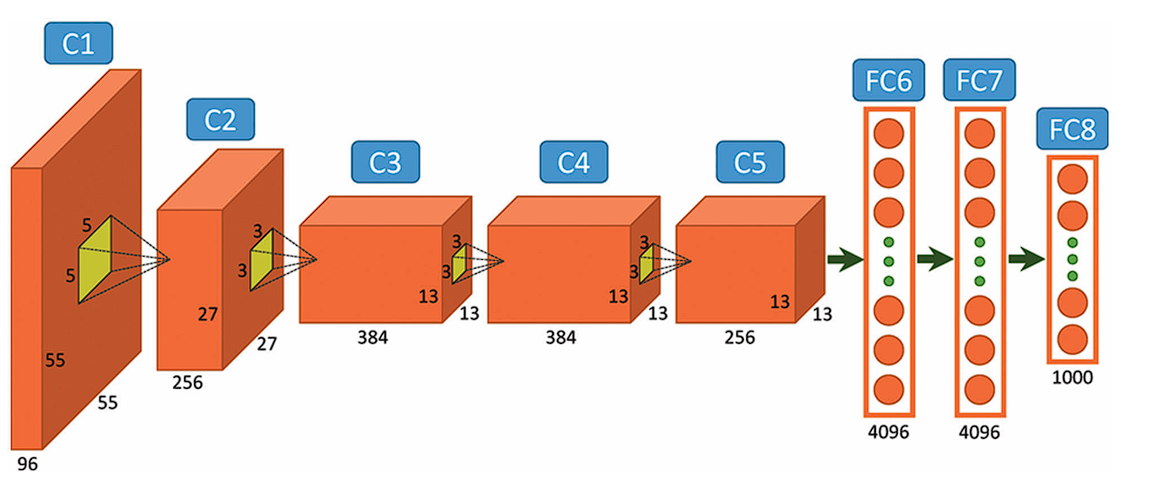

**Celda 1: Instalación e Importación de Librerías**

In [ ]:
# Instalación de librerías necesarias
# Comenta la siguiente línea si ya tienes instalada la librería torchvision
!pip install torchvision

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import json


Explicación: En esta celda, importamos todas las librerías necesarias para trabajar con PyTorch, cargar modelos preentrenados, procesar imágenes y visualizar resultados:

* torch y torch.nn: Para manejar tensores y definir redes neuronales.
* torchvision: Para acceder a modelos preentrenados y herramientas de procesamiento de imágenes.
* PIL y requests: Para manejar imágenes.
* matplotlib.pyplot: Para visualizar imágenes.
* json: Para manejar los nombres de las clases de ImageNet.

Celda 2: Cargar el Modelo Preentrenado AlexNet

In [ ]:
# Cargar AlexNet preentrenado
alexnet = models.alexnet(pretrained=True)
alexnet.eval()  # Establecer el modelo en modo evaluación

# Mover el modelo a GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet = alexnet.to(device)
print(f'Usando dispositivo: {device}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:05<00:00, 43.2MB/s]


Usando dispositivo: cpu


Explicación:

* Carga del Modelo: Utilizamos torchvision.models para cargar AlexNet preentrenado en el conjunto de datos ImageNet.
* Modo Evaluación: Configuramos el modelo en modo evaluación con eval(), lo que desactiva capas como Dropout y BatchNorm en modo de entrenamiento.
* Dispositivo de Cálculo: Verificamos si una GPU está disponible para acelerar las inferencias; de lo contrario, usamos la CPU.

**Celda 3: Descargar los Nombres de las Clases de ImageNet**

In [ ]:
# Descargar los nombres de las clases de ImageNet
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)
imagenet_classes = response.text.splitlines()


Explicación:

* Obtención de Etiquetas: Descargamos un archivo de texto que contiene los nombres de las 1000 clases de ImageNet. Estas etiquetas nos permitirán interpretar las predicciones del modelo.

**Celda 4: Cargar y Preprocesar una Imagen de Ejemplo**

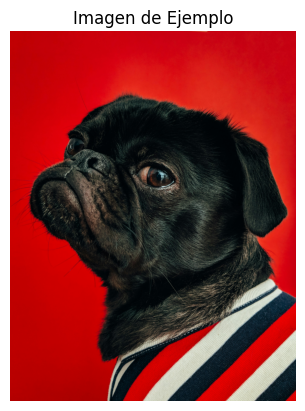

In [ ]:
# URL de una imagen de ejemplo
image_url = "https://images.unsplash.com/photo-1517423440428-a5a00ad493e8"  # Imagen de un perro Pug

# Descargar la imagen
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert('RGB')

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')
plt.title('Imagen de Ejemplo')
plt.show()

# Definir las transformaciones de preprocesamiento
preprocess = transforms.Compose([
    transforms.Resize(256),                # Redimensionar la imagen
    transforms.CenterCrop(224),            # Recortar el centro
    transforms.ToTensor(),                 # Convertir a tensor
    transforms.Normalize(                  # Normalizar con media y desviación estándar de ImageNet
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Aplicar las transformaciones
input_tensor = preprocess(img)

# Crear un batch de tamaño 1
input_batch = input_tensor.unsqueeze(0).to(device)


Explicación:

* Descarga de la Imagen: Utilizamos una URL para descargar una imagen de ejemplo (en este caso, un perro Pug).

* Visualización: Mostramos la imagen descargada para que los alumnos puedan verla antes de la clasificación.

* Preprocesamiento:

   * Redimensionamiento y Recorte: Ajustamos el tamaño de la imagen para que sea compatible con AlexNet.
   * Normalización: Normalizamos la imagen utilizando la media y desviación estándar utilizadas durante el entrenamiento de AlexNet en ImageNet.
   * Creación del Batch: Añadimos una dimensión adicional para simular un batch de tamaño 1.

**Celda 5: Realizar Inferencia y Obtener la Predicción**

In [ ]:
# Realizar la inferencia
with torch.no_grad():
    outputs = alexnet(input_batch)

# Obtener las probabilidades aplicando Softmax
probabilities = torch.nn.functional.softmax(outputs[0], dim=0)

# Obtener el índice de la clase con mayor probabilidad
_, predicted_idx = torch.max(probabilities, dim=0)

# Obtener el nombre de la clase
predicted_class = imagenet_classes[predicted_idx]

print(f'Clase Predicha: {predicted_class} con una probabilidad de {probabilities[predicted_idx].item()*100:.2f}%')


Clase Predicha: pug con una probabilidad de 80.00%


Explicación:

* Inferencia: Pasamos la imagen preprocesada a través del modelo para obtener las salidas.
* Softmax: Aplicamos la función Softmax para convertir las salidas en probabilidades.
* Predicción: Identificamos la clase con la mayor probabilidad y obtenemos su nombre correspondiente.
* Resultado: Imprimimos la clase predicha junto con su probabilidad.

**Celda 6: Visualizar la Predicción**

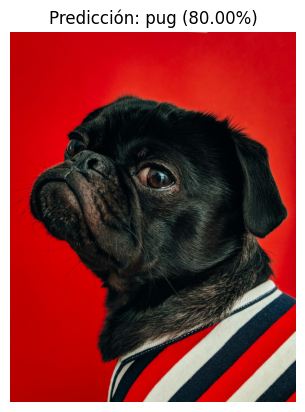

In [ ]:
# Mostrar la imagen con la predicción
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicción: {predicted_class} ({probabilities[predicted_idx].item()*100:.2f}%)')
plt.show()


Explicación: Visualizamos nuevamente la imagen de ejemplo, pero esta vez con el nombre de la clase predicha y su probabilidad, lo que facilita la comprensión de los resultados obtenidos por el modelo.

**Celda 7: Resumen de Resultados**

In [ ]:
# Resumen de la predicción
results = {
    'Clase Predicha': [predicted_class],
    'Probabilidad (%)': [probabilities[predicted_idx].item() * 100]
}

import pandas as pd

df_results = pd.DataFrame(results)
print(df_results)


  Clase Predicha  Probabilidad (%)
0            pug          79.99748


Explicación: Creamos un pequeño resumen en forma de tabla que muestra la clase predicha y su probabilidad correspondiente, proporcionando una visión clara y estructurada de los resultados obtenidos.

**Celda 8: Conclusión y Observaciones**

### **Lo que Hemos Aprendido:**
1. **Carga de Modelos Preentrenados:**
   - Aprendimos a cargar **AlexNet** preentrenado en **PyTorch** y a configurarlo para la inferencia.
   
2. **Preprocesamiento de Imágenes:**
   - Comprendimos la importancia de preprocesar las imágenes de entrada (redimensionamiento, recorte, normalización) para que sean compatibles con el modelo.
   
3. **Realización de Inferencia:**
   - Ejecutamos el modelo para obtener predicciones sobre una imagen de ejemplo y aprendimos a interpretar las salidas mediante Softmax.
   
4. **Interpretación de Resultados:**
   - Asociamos los índices de las predicciones con las clases reales de ImageNet para entender qué está clasificando el modelo.

### **Observaciones Importantes:**
- **Transfer Learning:**
  - Utilizar modelos preentrenados como AlexNet nos permite aprovechar conocimientos adquiridos en grandes conjuntos de datos, facilitando tareas de clasificación con menor esfuerzo computacional.
  
- **Limitaciones:**
  - Aunque AlexNet es potente, su rendimiento puede ser subóptimo en imágenes muy diferentes a las de ImageNet. Para mejorar la precisión en conjuntos de datos específicos, es recomendable realizar **fine-tuning** o ajustar el modelo según la tarea.

- **Exploración Adicional:**
  - Los alumnos pueden experimentar cargando diferentes imágenes y observando cómo AlexNet las clasifica, así como explorar otras arquitecturas preentrenadas disponibles en `torchvision.models` como **ResNet**, **VGG**, etc.

### **Próximos Pasos:**
- **Fine-Tuning de Modelos Preentrenados:**
  - Aprender a ajustar modelos preentrenados para tareas específicas mediante la modificación de capas finales y el reentrenamiento con nuevos datos.
  
- **Evaluación de Modelos:**
  - Implementar métricas adicionales para evaluar el rendimiento del modelo en diferentes clases y conjuntos de datos.
  
- **Implementación de Otras Arquitecturas:**
  - Explorar y comparar diferentes arquitecturas de CNN para comprender sus fortalezas y debilidades en diversas tareas de clasificación.



## **Parte 2: Construcción y Entrenamiento de una CNN Básica para CIFAR-10**

**¿Qué son las Redes Neuronales Convolucionales (CNNs)?**

Las Redes Neuronales Convolucionales (CNNs) son una clase de redes neuronales profundas especialmente eficaces para procesar datos con estructura de cuadrícula, como imágenes. Están diseñadas para capturar patrones espaciales y jerárquicos en los datos mediante el uso de capas convolucionales que aplican filtros a las entradas.

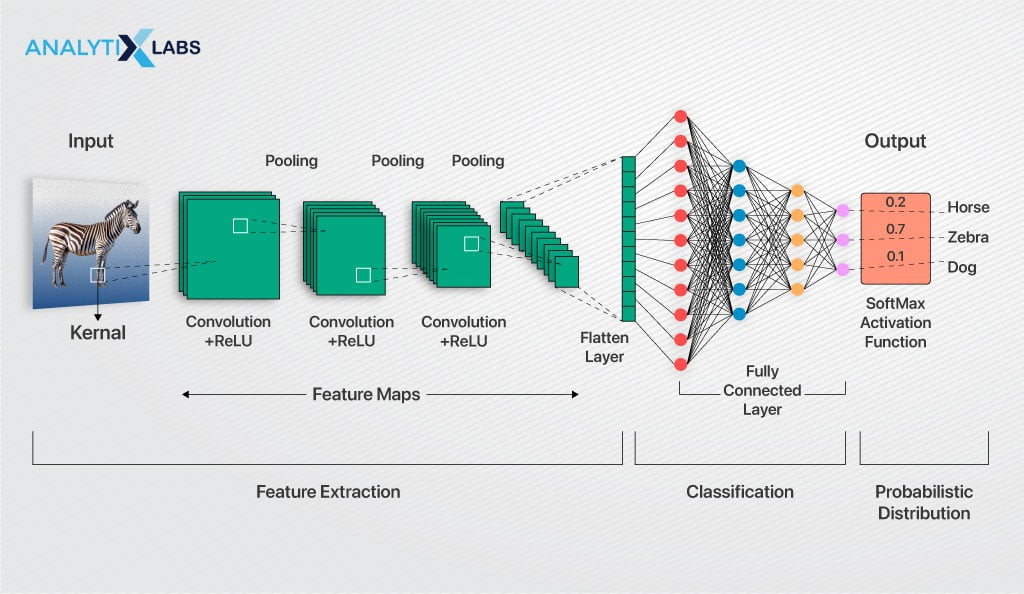

**Objetivo del Ejercicio**

Implementar y entrenar una CNN básica en PyTorch para clasificar imágenes del conjunto de datos CIFAR-10. A lo largo del ejercicio, se realizará lo siguiente:

* Construcción de una CNN: Definir y comprender la arquitectura básica de una CNN.
* Entrenamiento del Modelo: Utilizar diferentes optimizadores y funciones de activación para observar su impacto en el rendimiento.
* Evaluación y Visualización: Evaluar la precisión del modelo en el conjunto de prueba y visualizar los resultados.

**Celda 1: Instalación e Importación de Librerías**

In [ ]:
# Instalación de librerías necesarias
# Comenta la siguiente línea si ya tienes instalada la librería torchvision
!pip install torchvision

In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


Explicación: En esta celda, importamos todas las librerías necesarias para nuestro proyecto:

* torch y torch.nn: Para construir y entrenar las redes neuronales.
* torch.optim: Para utilizar optimizadores como SGD y Adam.
* torchvision: Para manejar y transformar el conjunto de datos CIFAR-10.
* matplotlib.pyplot: Para visualizar las imágenes y los resultados del entrenamiento.
* tqdm: Para mostrar barras de progreso durante el entrenamiento.

##Celda 2: Configuración de Parámetros y Preparación del Conjunto de Datos

In [ ]:
# Configuración de parámetros
batch_size = 64
learning_rate = 0.0001
num_epochs = 10
image_size = 32
num_classes = 10

# Transformaciones para normalizar los datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar a [-1, 1]
])

# Cargar el conjunto de datos CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# Crear DataLoader para entrenamiento y prueba
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Dispositivo: GPU si está disponible, sino CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Usando dispositivo: {device}')


100%|██████████| 170498071/170498071 [00:02<00:00, 63247945.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Usando dispositivo: cpu


Explicación:

Parámetros del Modelo:

* batch_size: Número de muestras por lote durante el entrenamiento.
* learning_rate: Tasa de aprendizaje para los optimizadores.
* num_epochs: Número de épocas para entrenar la CNN.
* image_size: Dimensión de las imágenes (CIFAR-10 tiene 32x32 píxeles).
* num_classes: Número de clases en CIFAR-10 (10 categorías de objetos).

Transformaciones:

* Convertimos las imágenes a tensores y las normalizamos para que los valores de los píxeles estén en el rango [-1, 1]. Esto ayuda a estabilizar el entrenamiento de la CNN.

Carga del Conjunto de Datos:

* Utilizamos torchvision.datasets.CIFAR10 para descargar y cargar el conjunto de datos CIFAR-10.
* DataLoader facilita la iteración sobre los datos en lotes y mezcla aleatoriamente las muestras para el conjunto de entrenamiento.

Dispositivo:

* Verificamos si hay una GPU disponible para acelerar el entrenamiento. Si no, usamos la CPU.

**Celda 3: Definición de la Arquitectura de la CNN**

In [ ]:
# Definición de la CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10, activation='leakyrelu'):
        super(SimpleCNN, self).__init__()
        # Definir las capas convolucionales
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(0.1) if activation == 'leakyrelu' else nn.Tanh(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1) if activation == 'leakyrelu' else nn.Tanh(),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.1) if activation == 'leakyrelu' else nn.Tanh(),
            nn.MaxPool2d(2)
        )
        # Definir las capas completamente conectadas
        self.fc1 = nn.Linear(128 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.activation = nn.LeakyReLU(0.1) if activation == 'leakyrelu' else nn.Tanh()

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)  # Aplanar
        out = self.activation(self.fc1(out))
        out = self.fc2(out)
        return out

# Instanciar el modelo
model = SimpleCNN(num_classes=num_classes, activation='leakyrelu').to(device)
print(model)


SimpleCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Line

Explicación:

Arquitectura de la CNN:

Capas Convolucionales (Convolutional Layers):

* layer1: Conv2d -> BatchNorm2d -> LeakyReLU/Tanh -> MaxPool2d
* layer2: Conv2d -> BatchNorm2d -> LeakyReLU/Tanh -> MaxPool2d
* layer3: Conv2d -> BatchNorm2d -> LeakyReLU/Tanh -> MaxPool2d

Capas Completamente Conectadas (Fully Connected Layers):

* fc1: Linear -> LeakyReLU/Tanh
* fc2: Linear (Salida para clasificación en 10 clases)

Funciones de Activación (Activation Functions):

* Permite cambiar entre LeakyReLU y Tanh mediante el parámetro activation.

Batch Normalization (Batch Normalization):

* Ayuda a estabilizar y acelerar el entrenamiento normalizando las activaciones de las capas anteriores.

*  Aplanamiento (Flattening):

Convierte las activaciones 3D de las capas convolucionales en un vector 1D para las capas completamente conectadas.

**Celda 4: Definición de la Función de Pérdida y los Optimizadores**

In [ ]:
# Definir la función de pérdida
criterion = nn.CrossEntropyLoss()

# Definir el optimizador (SGD inicialmente)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

print("Modelo, función de pérdida y optimizador definidos.")


Modelo, función de pérdida y optimizador definidos.


Explicación:

Función de Pérdida:

* Utilizamos CrossEntropyLoss, adecuada para problemas de clasificación múltiple.

Optimizador:

* Inicialmente, usamos Stochastic Gradient Descent (SGD) con una tasa de aprendizaje de 0.0001.


**Celda 5: Función para Entrenar el Modelo**

In [ ]:
# Función para entrenar el modelo
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        loop = tqdm(train_loader, desc=f'Época [{epoch+1}/{num_epochs}]')
        for images, labels in loop:
            images = images.to(device)
            labels = labels.to(device)

            # Adelante
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Atrás y optimizar
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Actualizar la barra de progreso
            loop.set_postfix(loss=loss.item(), accuracy=100.*correct/total)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = 100. * correct / total
        print(f'End of Epoch {epoch+1}: Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

    print('Entrenamiento completado.')


Explicación: Esta función realiza el ciclo de entrenamiento del modelo:

Modo de Entrenamiento:

* model.train() activa las capas como Dropout y BatchNorm en modo de entrenamiento.

Iteración por Épocas:

* Para cada época, iteramos sobre todos los lotes del train_loader.

Proceso por Lote:

* Adelante (Forward Pass): Calculamos las predicciones del modelo.
* Cálculo de Pérdida: Evaluamos la discrepancia entre las predicciones y las etiquetas verdaderas.
* Atrás (Backward Pass): Calculamos los gradientes.
* Actualización de Pesos: Ajustamos los pesos del modelo utilizando el optimizador.

Monitoreo:

* Actualizamos la barra de progreso con la pérdida y la precisión acumulada.
Al final de cada época, imprimimos la pérdida promedio y la precisión en el conjunto de entrenamiento.

* Al final de cada época, imprimimos la pérdida promedio y la precisión en el conjunto de entrenamiento.

**Celda 6: Entrenamiento Inicial con Optimizer SGD y Activación LeakyReLU**

In [ ]:
# Entrenar el modelo con SGD y LeakyReLU
print("Entrenando el modelo con SGD y LeakyReLU...")
train_model(model, train_loader, criterion, optimizer, num_epochs)


Entrenando el modelo con SGD y LeakyReLU...


Época [1/10]: 100%|██████████| 782/782 [01:58<00:00,  6.58it/s, accuracy=16.3, loss=2.18]


End of Epoch 1: Loss: 2.2662, Accuracy: 16.34%


Época [2/10]: 100%|██████████| 782/782 [01:56<00:00,  6.72it/s, accuracy=22.2, loss=2.21]


End of Epoch 2: Loss: 2.2107, Accuracy: 22.25%


Época [3/10]: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s, accuracy=25.6, loss=2.22]


End of Epoch 3: Loss: 2.1612, Accuracy: 25.58%


Época [4/10]: 100%|██████████| 782/782 [01:47<00:00,  7.31it/s, accuracy=27.9, loss=2.04]


End of Epoch 4: Loss: 2.1161, Accuracy: 27.93%


Época [5/10]: 100%|██████████| 782/782 [01:46<00:00,  7.33it/s, accuracy=29.6, loss=1.9]


End of Epoch 5: Loss: 2.0731, Accuracy: 29.57%


Época [6/10]: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s, accuracy=31.1, loss=2.09]


End of Epoch 6: Loss: 2.0333, Accuracy: 31.14%


Época [7/10]: 100%|██████████| 782/782 [01:48<00:00,  7.23it/s, accuracy=32.3, loss=1.87]


End of Epoch 7: Loss: 1.9966, Accuracy: 32.27%


Época [8/10]: 100%|██████████| 782/782 [01:46<00:00,  7.33it/s, accuracy=33.3, loss=2.04]


End of Epoch 8: Loss: 1.9610, Accuracy: 33.30%


Época [9/10]: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s, accuracy=34.4, loss=1.79]


End of Epoch 9: Loss: 1.9273, Accuracy: 34.37%


Época [10/10]: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s, accuracy=35.1, loss=1.92]

End of Epoch 10: Loss: 1.8975, Accuracy: 35.05%
Entrenamiento completado.


Explicación: En esta celda, iniciamos el entrenamiento de la CNN utilizando:

* Optimizador: Stochastic Gradient Descent (SGD) con tasa de aprendizaje de 0.0001.
* Función de Activación: LeakyReLU.

Al finalizar, obtendremos la precisión del modelo en el conjunto de entrenamiento.

**Celda 7: Evaluación del Modelo en el Conjunto de Prueba**

In [ ]:
# Función para evaluar el modelo
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Evaluando'):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100. * correct / total
    print(f'Precisión en el conjunto de prueba: {acc:.2f}%')
    return acc

# Evaluar el modelo entrenado con SGD
print("Evaluando el modelo entrenado con SGD y LeakyReLU...")
test_accuracy_sgd = evaluate_model(model, test_loader)


Evaluando el modelo entrenado con SGD y LeakyReLU...


Evaluando: 100%|██████████| 157/157 [00:10<00:00, 14.47it/s]

Precisión en el conjunto de prueba: 36.06%


Explicación: Esta celda evalúa el rendimiento del modelo entrenado en el conjunto de prueba:

Modo de Evaluación:

* model.eval() desactiva capas como Dropout y BatchNorm en modo de evaluación.

Ciclo de Evaluación:

* Iteramos sobre todos los lotes del test_loader sin calcular gradientes.
* Calculamos las predicciones y contamos las correctas.

Resultado:

* Imprimimos la precisión del modelo en el conjunto de prueba.

**Celda 8: Reentrenar con Optimizer Adam**

In [ ]:
# Cambiar el optimizador a Adam
optimizer_adam = optim.Adam(model.parameters(), lr=learning_rate)

# Reentrenar el modelo con Adam y LeakyReLU
print("Reentrenando el modelo con Adam y LeakyReLU...")
train_model(model, train_loader, criterion, optimizer_adam, num_epochs)

# Evaluar el modelo entrenado con Adam
print("Evaluando el modelo entrenado con Adam y LeakyReLU...")
test_accuracy_adam = evaluate_model(model, test_loader)


Reentrenando el modelo con Adam y LeakyReLU...


Época [1/10]: 100%|██████████| 782/782 [01:48<00:00,  7.21it/s, accuracy=51, loss=1.1]


End of Epoch 1: Loss: 1.3867, Accuracy: 51.04%


Época [2/10]: 100%|██████████| 782/782 [01:48<00:00,  7.19it/s, accuracy=62.2, loss=0.638]


End of Epoch 2: Loss: 1.0857, Accuracy: 62.15%


Época [3/10]: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s, accuracy=66.6, loss=0.706]


End of Epoch 3: Loss: 0.9630, Accuracy: 66.62%


Época [4/10]: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s, accuracy=70, loss=1.12]


End of Epoch 4: Loss: 0.8753, Accuracy: 69.97%


Época [5/10]: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s, accuracy=72.2, loss=0.9]


End of Epoch 5: Loss: 0.8073, Accuracy: 72.21%


Época [6/10]: 100%|██████████| 782/782 [01:49<00:00,  7.13it/s, accuracy=74.5, loss=1.14]


End of Epoch 6: Loss: 0.7488, Accuracy: 74.54%


Época [7/10]: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s, accuracy=76.2, loss=0.705]


End of Epoch 7: Loss: 0.7005, Accuracy: 76.21%


Época [8/10]: 100%|██████████| 782/782 [01:49<00:00,  7.13it/s, accuracy=78, loss=0.771]


End of Epoch 8: Loss: 0.6503, Accuracy: 78.00%


Época [9/10]: 100%|██████████| 782/782 [01:49<00:00,  7.16it/s, accuracy=79.4, loss=0.712]


End of Epoch 9: Loss: 0.6061, Accuracy: 79.42%


Época [10/10]: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s, accuracy=80.5, loss=0.237]


End of Epoch 10: Loss: 0.5690, Accuracy: 80.51%
Entrenamiento completado.
Evaluando el modelo entrenado con Adam y LeakyReLU...


Evaluando: 100%|██████████| 157/157 [00:10<00:00, 15.62it/s]

Precisión en el conjunto de prueba: 69.84%


Explicación: En esta celda, repetimos el entrenamiento del modelo, pero esta vez utilizando:

* Optimizador: Adam con la misma tasa de aprendizaje de 0.0001.
* Función de Activación: Mantiene LeakyReLU.

Después del entrenamiento, evaluamos nuevamente el modelo en el conjunto de prueba para comparar la precisión obtenida con la anterior.

**Celda 9: Reentrenar con Activación Tanh**

In [ ]:
# Reiniciar el modelo para el próximo experimento
model_tanh = SimpleCNN(num_classes=num_classes, activation='tanh').to(device)
print("Modelo reiniciado con Tanh como función de activación.")

# Definir el optimizador (SGD) para el nuevo modelo
optimizer_tanh_sgd = optim.SGD(model_tanh.parameters(), lr=learning_rate)

# Entrenar el modelo con SGD y Tanh
print("Entrenando el modelo con SGD y Tanh...")
train_model(model_tanh, train_loader, criterion, optimizer_tanh_sgd, num_epochs)

# Evaluar el modelo entrenado con SGD y Tanh
print("Evaluando el modelo entrenado con SGD y Tanh...")
test_accuracy_tanh_sgd = evaluate_model(model_tanh, test_loader)


Modelo reiniciado con Tanh como función de activación.
Entrenando el modelo con SGD y Tanh...


Época [1/10]: 100%|██████████| 782/782 [01:54<00:00,  6.85it/s, accuracy=14.7, loss=2.26]


End of Epoch 1: Loss: 2.2790, Accuracy: 14.74%


Época [2/10]: 100%|██████████| 782/782 [01:54<00:00,  6.83it/s, accuracy=18.9, loss=2.22]


End of Epoch 2: Loss: 2.2153, Accuracy: 18.88%


Época [3/10]: 100%|██████████| 782/782 [01:53<00:00,  6.89it/s, accuracy=22, loss=2.19]


End of Epoch 3: Loss: 2.1666, Accuracy: 22.02%


Época [4/10]: 100%|██████████| 782/782 [01:53<00:00,  6.86it/s, accuracy=24.4, loss=2.21]


End of Epoch 4: Loss: 2.1275, Accuracy: 24.44%


Época [5/10]: 100%|██████████| 782/782 [01:53<00:00,  6.89it/s, accuracy=25.7, loss=2.03]


End of Epoch 5: Loss: 2.0963, Accuracy: 25.67%


Época [6/10]: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s, accuracy=27, loss=1.91]


End of Epoch 6: Loss: 2.0697, Accuracy: 26.96%


Época [7/10]: 100%|██████████| 782/782 [01:53<00:00,  6.89it/s, accuracy=28, loss=2.12]


End of Epoch 7: Loss: 2.0476, Accuracy: 28.01%


Época [8/10]: 100%|██████████| 782/782 [01:53<00:00,  6.87it/s, accuracy=28.9, loss=1.84]


End of Epoch 8: Loss: 2.0274, Accuracy: 28.86%


Época [9/10]: 100%|██████████| 782/782 [01:55<00:00,  6.80it/s, accuracy=29.7, loss=2.08]


End of Epoch 9: Loss: 2.0099, Accuracy: 29.73%


Época [10/10]: 100%|██████████| 782/782 [01:53<00:00,  6.91it/s, accuracy=30.2, loss=2.02]


End of Epoch 10: Loss: 1.9952, Accuracy: 30.18%
Entrenamiento completado.
Evaluando el modelo entrenado con SGD y Tanh...


Evaluando: 100%|██████████| 157/157 [00:11<00:00, 13.10it/s]

Precisión en el conjunto de prueba: 30.93%


Explicación: En esta celda, exploramos cómo afecta cambiar la función de activación a Tanh:

Reinicio del Modelo:
* Creamos una nueva instancia de la CNN con la función de activación tanh.
Optimizador:
* Utilizamos nuevamente SGD con la misma tasa de aprendizaje.
Entrenamiento y Evaluación:
* Entrenamos el nuevo modelo y evaluamos su precisión en el conjunto de prueba.

**Celda 10: Reentrenar con Optimizer Adam y Activación Tanh**

In [ ]:
# Definir el optimizador Adam para el modelo con Tanh
optimizer_tanh_adam = optim.Adam(model_tanh.parameters(), lr=learning_rate)

# Reentrenar el modelo con Adam y Tanh
print("Reentrenando el modelo con Adam y Tanh...")
train_model(model_tanh, train_loader, criterion, optimizer_tanh_adam, num_epochs)

# Evaluar el modelo entrenado con Adam y Tanh
print("Evaluando el modelo entrenado con Adam y Tanh...")
test_accuracy_tanh_adam = evaluate_model(model_tanh, test_loader)


Explicación: Finalmente, combinamos Adam con la función de activación Tanh para observar cómo esta combinación afecta el rendimiento del modelo:

Optimizador:

* Utilizamos Adam para el modelo con Tanh.
Entrenamiento y Evaluación:

* Entrenamos el modelo y evaluamos su precisión en el conjunto de prueba para comparar con las configuraciones anteriores.


**Celda 11: Visualización de Resultados**

In [ ]:
# Crear una tabla resumen de las precisiones obtenidas
results = {
    'Configuración': [
        'SGD + LeakyReLU',
        'Adam + LeakyReLU',
        'SGD + Tanh',
        'Adam + Tanh'
    ],
    'Precisión en Prueba (%)': [
        test_accuracy_sgd,
        test_accuracy_adam,
        test_accuracy_tanh_sgd,
        test_accuracy_tanh_adam
    ]
}

import pandas as pd

df_results = pd.DataFrame(results)
print(df_results)

# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(8,6))
plt.bar(df_results['Configuración'], df_results['Precisión en Prueba (%)'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Configuración')
plt.ylabel('Precisión en Prueba (%)')
plt.title('Comparación de Configuraciones de Optimización y Activación')
plt.ylim(0, 100)
for index, value in enumerate(df_results['Precisión en Prueba (%)']):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center')
plt.show()


Explicación: En esta celda, resumimos y visualizamos las precisiones obtenidas con las diferentes configuraciones de optimizador y función de activación:

Tabla Resumen:
* Mostramos una tabla que compara las configuraciones y sus respectivas precisiones en el conjunto de prueba.

Gráfico de Barras:

* Visualizamos las precisiones con un gráfico de barras para facilitar la comparación.

Interpretación:

* Observamos cuál combinación de optimizador y función de activación proporciona el mejor rendimiento en la clasificación de imágenes CIFAR-10.

**Celda 12: Conclusión y Observaciones**

### **Resumen de lo Aprendido:**
1. **Construcción de una CNN Básica:**
   - Aprendimos a definir una arquitectura sencilla de CNN utilizando capas convolucionales, de pooling y completamente conectadas.
   
2. **Impacto de los Optimizadores:**
   - **SGD vs. Adam:**
     - **SGD:** Un optimizador clásico que puede requerir tasas de aprendizaje más bajas para converger de manera estable.
     - **Adam:** Un optimizador adaptativo que generalmente converge más rápido y puede manejar tasas de aprendizaje más altas.
   - Observamos que **Adam** tiende a proporcionar una mayor precisión en menos épocas en comparación con **SGD**.

3. **Impacto de las Funciones de Activación:**
   - **LeakyReLU vs. Tanh:**
     - **LeakyReLU:** Permite pequeños gradientes cuando la unidad está inactiva, ayudando a prevenir el problema de neuronas muertas.
     - **Tanh:** Funciona bien en capas ocultas, pero puede saturarse y ralentizar el entrenamiento.
   - Observamos que **LeakyReLU** generalmente proporciona mejores resultados en términos de precisión en comparación con **Tanh**.

4. **Visualización de Resultados:**
   - La comparación visual de las diferentes configuraciones mostró cómo pequeños cambios en la arquitectura y los hiperparámetros pueden afectar significativamente el rendimiento del modelo.

### **Observaciones Importantes:**
- **Equilibrio entre Optimización y Activación:**
  - La combinación de **Adam** con **LeakyReLU** demostró ser particularmente efectiva para este problema de clasificación, ofreciendo una buena convergencia y alta precisión.
  
- **Importancia de la Función de Activación:**
  - Las funciones de activación juegan un papel crucial en la capacidad del modelo para aprender representaciones complejas de los datos. **LeakyReLU** es generalmente más robusta en redes profundas comparada con **Tanh**.

### **Próximos Pasos:**
- **Experimentar con Arquitecturas Más Profundas:**
  - Añadir más capas convolucionales y completamente conectadas para capturar patrones más complejos.
  
- **Implementar Técnicas de Regularización:**
  - Utilizar **Dropout** y **Batch Normalization** para mejorar la generalización del modelo y prevenir el sobreajuste.
  
- **Ajustar Hiperparámetros:**
  - Explorar diferentes tasas de aprendizaje, tamaños de lote y otras configuraciones para optimizar el rendimiento del modelo.

### **Recursos Adicionales:**
Para profundizar más en el entrenamiento y la optimización de CNNs, te recomiendo revisar los siguientes recursos:
- **Documentación de PyTorch:**
  - [Tutorial de CNN en PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
  
- **Video Tutorial:**
  - [Curso de PyTorch - CNNs y Transfer Learning](https://www.youtube.com/watch?v=GIsg-ZUy0MY)

¡Felicidades por completar el ejercicio!
